In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl

# LEVEL 1

In [ ]:
data_DB =  pd.read_csv('/content/DB.csv')
data_EP = pd.read_csv('/content/EP.csv')
data_MS = pd.read_csv('/content/MS.csv')

# SOAL A

In [ ]:
data_DB.head()

,Glucose,BloodPressure,Insulin,Outcome
0,148,72,0,diabetes
1,85,66,0,no diabetes
2,183,64,0,diabetes
3,89,66,94,no diabetes
4,137,40,168,diabetes


In [ ]:
data_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Glucose        768 non-null    int64 
 1   BloodPressure  768 non-null    int64 
 2   Insulin        768 non-null    int64 
 3   Outcome        768 non-null    object
dtypes: int64(3), object(1)
memory usage: 24.1+ KB


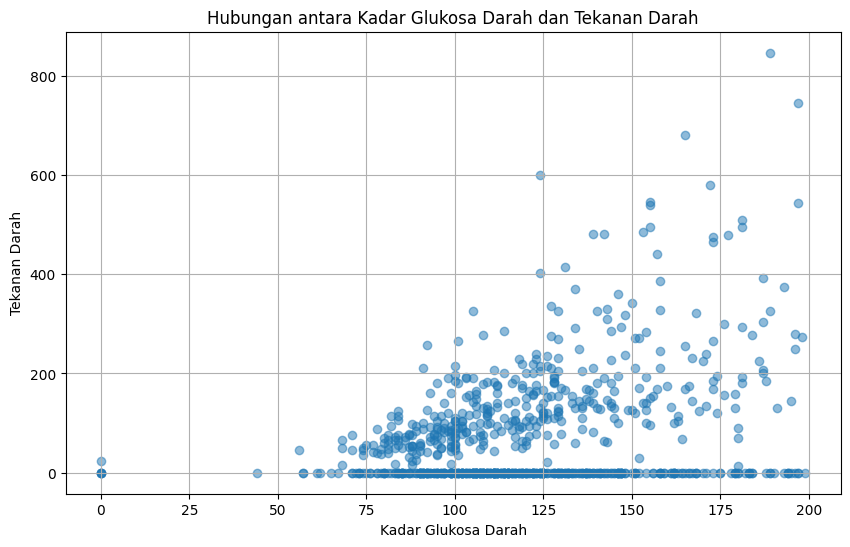

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_DB["Glucose"], data_DB["Insulin"], alpha=0.5)

plt.xlabel("Kadar Glukosa Darah")
plt.ylabel("Insulin")

plt.title("Hubungan antara Kadar Glukosa Darah dan Tekanan Darah")

plt.grid(True)
plt.show()

Low degree korelasi

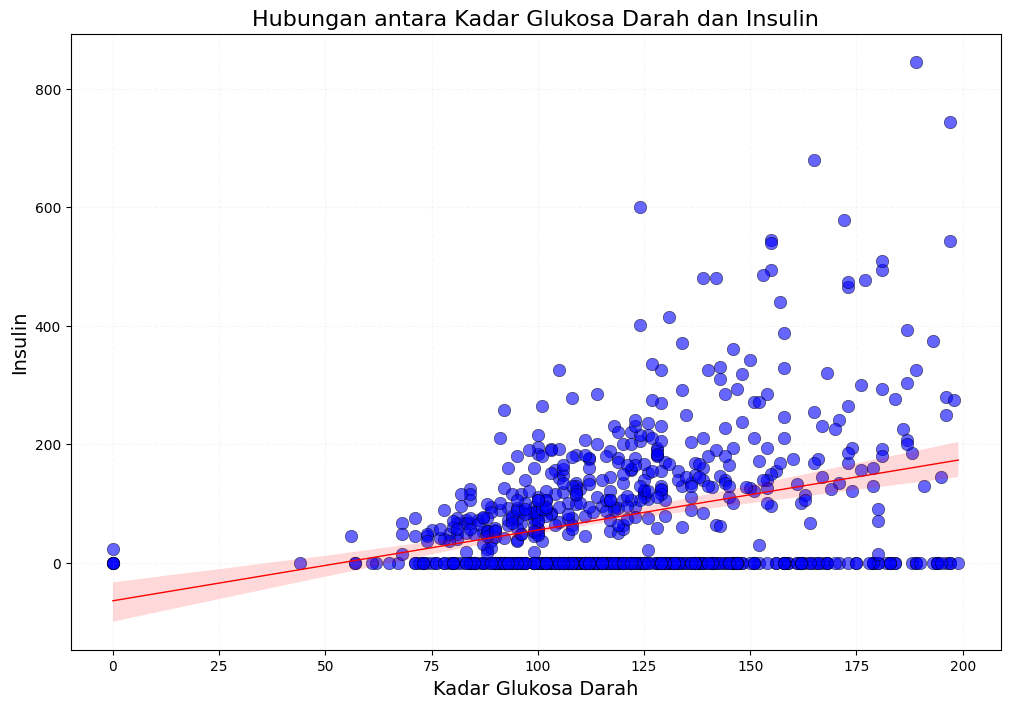

In [ ]:
# Membuat scatter plot dengan ukuran dan warna yang lebih jelas
plt.figure(figsize=(12, 8))
plt.scatter(data_DB["Glucose"], data_DB["Insulin"], alpha=0.6, s=80, c='blue', edgecolor='k', linewidth=0.5)

# Menambahkan garis regresi untuk melihat tren
sns.regplot(x=data_DB["Glucose"], y=data_DB["Insulin"], scatter=False, color='red', line_kws={"linewidth": 1})

# Memberikan label pada sumbu
plt.xlabel("Kadar Glukosa Darah", fontsize=14)
plt.ylabel("Insulin", fontsize=14)

# Memberikan judul pada plot
plt.title("Hubungan antara Kadar Glukosa Darah dan Insulin", fontsize=16)

# Mengaktifkan grid
plt.grid(True, linestyle='--', alpha=0.1)

plt.show()

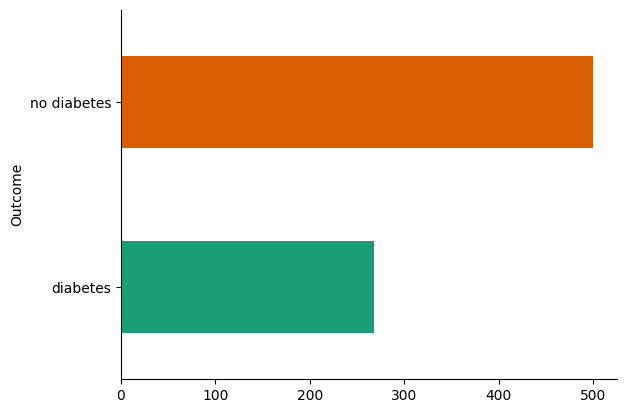

In [ ]:
data_DB.groupby('Outcome').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Pada data

# SOAL B

In [ ]:
data_EP.head()

,DATE,IPG2211A2N
0,2015-01-01,120.2696
1,2015-02-01,116.3788
2,2015-03-01,104.4706
3,2015-04-01,89.7461
4,2015-05-01,91.0930


In [ ]:
import datetime

def convert_to_datetime(date_string):
  return datetime.datetime.strptime(date_string, '%Y-%m-%d')

data_EP['DATE'] = data_EP['DATE'].apply(convert_to_datetime)

In [ ]:
data_EP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        36 non-null     datetime64[ns]
 1   IPG2211A2N  36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


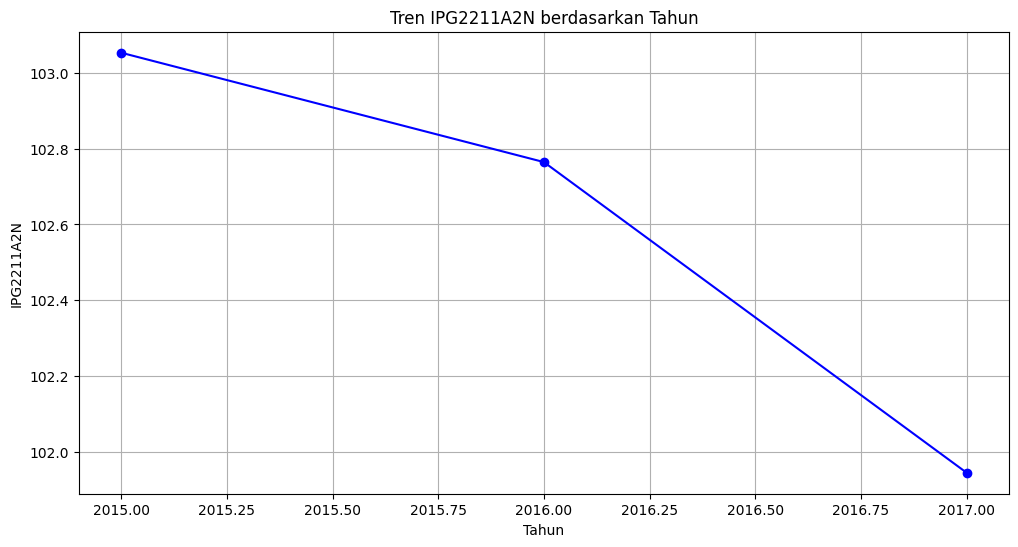

In [ ]:
data_EP['Year'] = data_EP['DATE'].dt.year

data_grouped = data_EP.groupby('Year')['IPG2211A2N'].mean()

plt.figure(figsize=(12, 6))
plt.plot(data_grouped.index, data_grouped.values, marker='o', linestyle='-', color='blue')

plt.xlabel('Tahun')
plt.ylabel('IPG2211A2N')

plt.title('Tren IPG2211A2N berdasarkan Tahun')

plt.grid(True)
plt.show()

Tren IPG menurun terus berdasarkan visualisasi line plot diatas

# SOAL C

In [ ]:
data_MS.head()

,Brand,Price,UnitsSold
0,Green Inc,1196.95,85
1,Thomas-Thompson,1010.34,64
2,Sanchez-Williams,400.80,95
3,Greer and Sons,338.60,79
4,Brown and Sons,839.79,41


In [ ]:
data_MS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      1000 non-null   object 
 1   Price      1000 non-null   float64
 2   UnitsSold  1000 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB


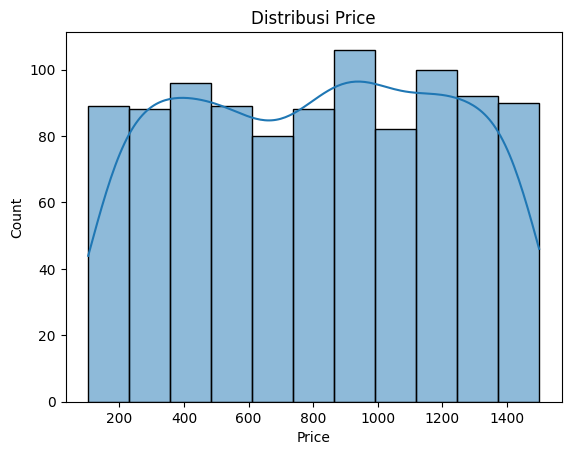

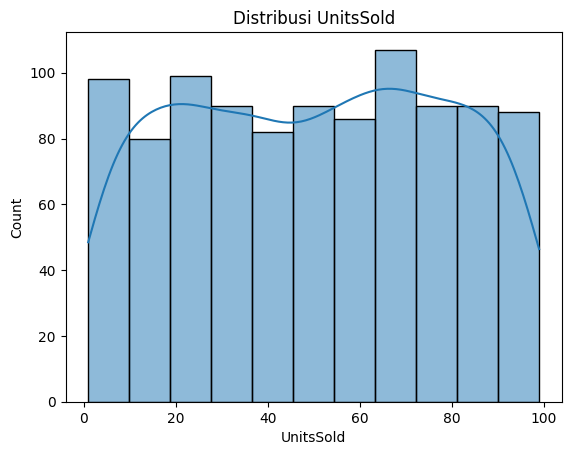

In [ ]:
for column in data_MS.select_dtypes(include=['number']):
    sns.histplot(data=data_MS, x=column, kde=True)
    plt.title(f"Distribusi {column}")
    plt.show()

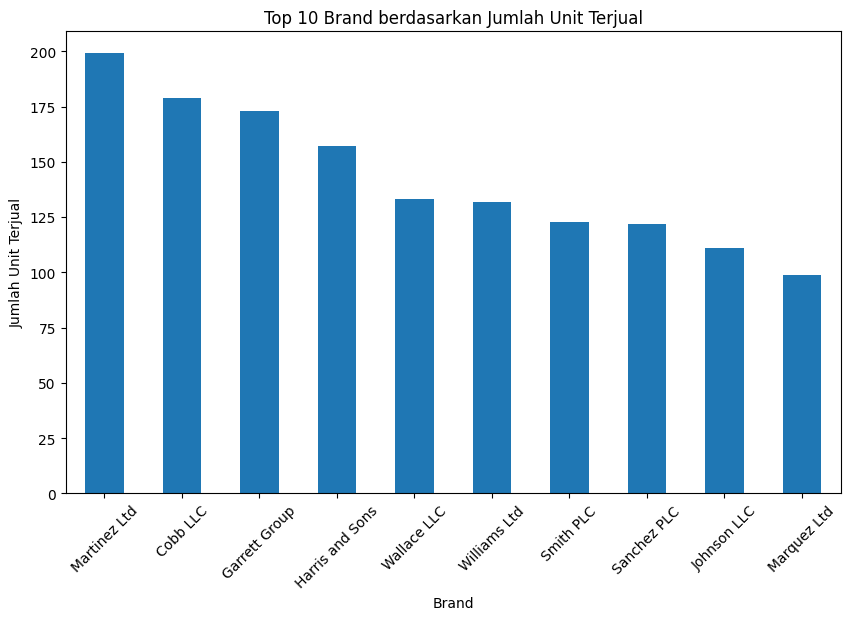

In [ ]:
brand_sales = data_MS.groupby('Brand')['UnitsSold'].sum().sort_values(ascending=False)

top_10_brands = brand_sales.head(10)

plt.figure(figsize=(10, 6))
top_10_brands.plot(kind='bar')
plt.title('Top 10 Brand berdasarkan Jumlah Unit Terjual')
plt.xlabel('Brand')
plt.ylabel('Jumlah Unit Terjual')
plt.xticks(rotation=45)
plt.show()

In [ ]:
'''
for column in data_MS.select_dtypes(include=['number']):
  # Hitung value counts dan cari index maksimum
  max_value = data_MS[column].value_counts().idxmax()

  # Buat histogram
  sns.histplot(data=data_MS, x=column, kde=True)

  # Tambahkan anotasi untuk nilai tertinggi
  plt.annotate(f"Nilai Tertinggi: {max_value}", xy=(max_value, 0),
              xytext=(max_value + 10, 10), arrowprops=dict(facecolor='black', shrink=0.05))

  plt.title(f"Distribusi {column}")
  plt.show()
  print(max_value)
  '''

'\nfor column in data_MS.select_dtypes(include=[\'number\']):\n  # Hitung value counts dan cari index maksimum\n  max_value = data_MS[column].value_counts().idxmax()\n  \n  # Buat histogram\n  sns.histplot(data=data_MS, x=column, kde=True)\n  \n  # Tambahkan anotasi untuk nilai tertinggi\n  plt.annotate(f"Nilai Tertinggi: {max_value}", xy=(max_value, 0), \n              xytext=(max_value + 10, 10), arrowprops=dict(facecolor=\'black\', shrink=0.05))\n  \n  plt.title(f"Distribusi {column}")\n  plt.show()\n  print(max_value)\n  '

In [ ]:
max_value

95

In [ ]:
data_MS['Brand'].nunique()

980

In [ ]:
data_MS['UnitsSold'].min()

1

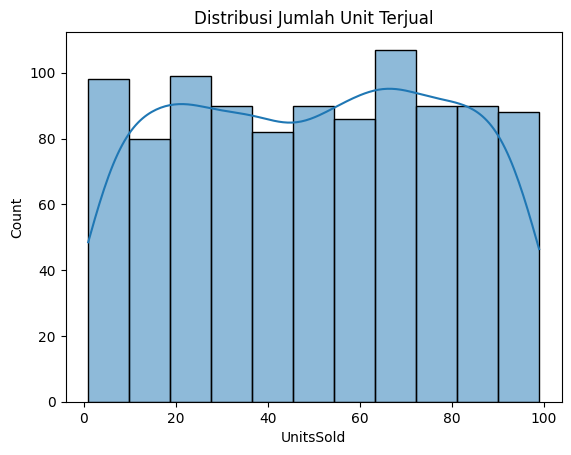

In [ ]:
sns.histplot(data=data_MS, x="UnitsSold", kde=True)
plt.title("Distribusi Jumlah Unit Terjual")
plt.show()

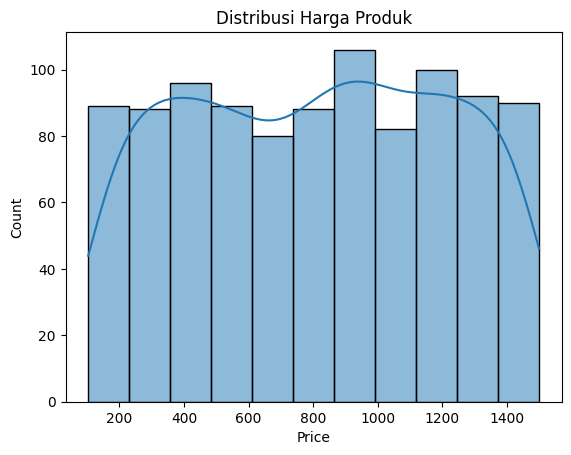

In [ ]:
sns.histplot(data=data_MS, x="Price", kde=True)
plt.title("Distribusi Harga Produk")
plt.show()